In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('sample_product_demand.csv.gz')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| date       | product_id   | product_name         | price   | demand   | promotion   |
|:-----------|:-------------|:---------------------|:--------|:---------|:------------|
| 2022-01-01 | P001         | Coffee_Beans_Arabica | 9.94    | 51       | 0           |
| 2022-01-01 | P002         | Espresso_Machine_V1  | 11.79   | 54       | 0           |
| 2022-01-01 | P003         | Milk_Frother_Pro     | 11.21   | 49       | 0           |
| 2022-01-01 | P004         | Tea_Sampler_Green    | 12.12   | 39       | 0           |
| 2022-01-01 | P005         | Chai_Latte_Mix       | 12.91   | 44       | 0           |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21920 entries, 0 to 21919
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          21920 non-null  object 
 1   product_id    21920 non-null  object 
 2   product_name  21920 non-null  object 
 3   price         21920 non-null  float64
 4   demand       

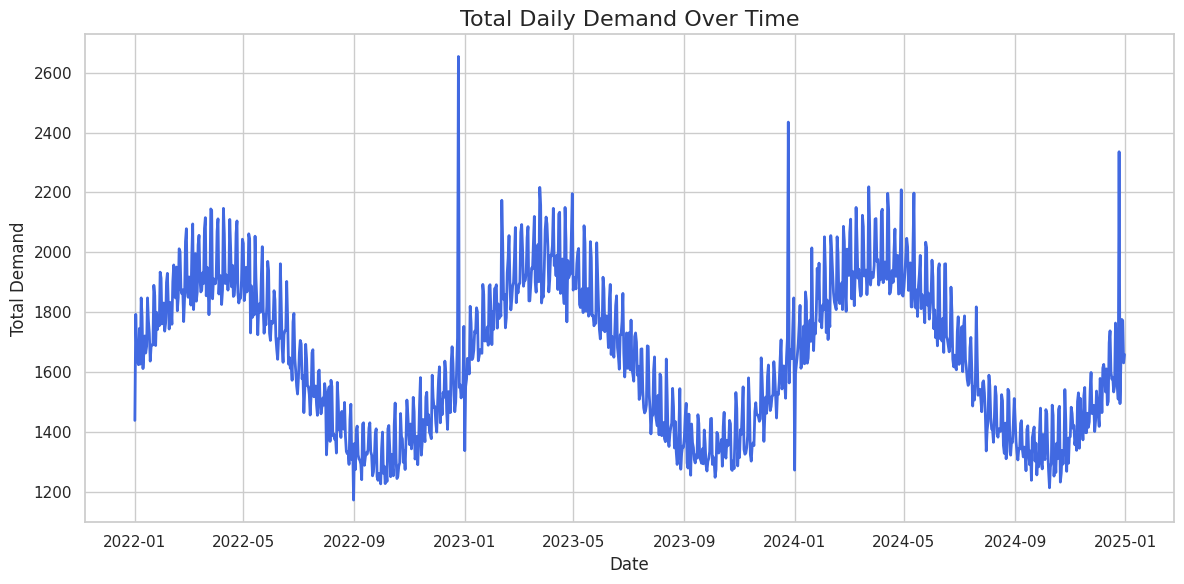

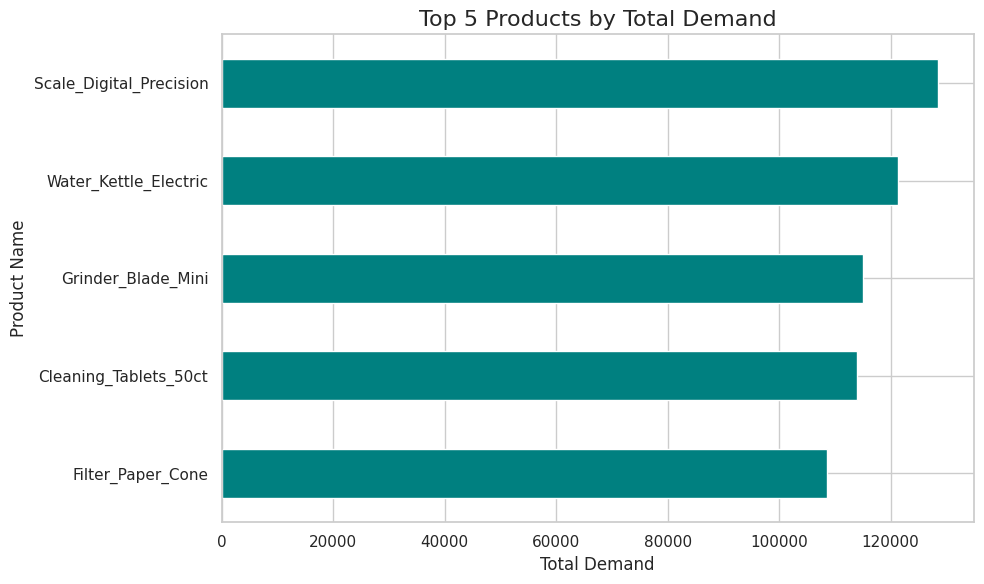

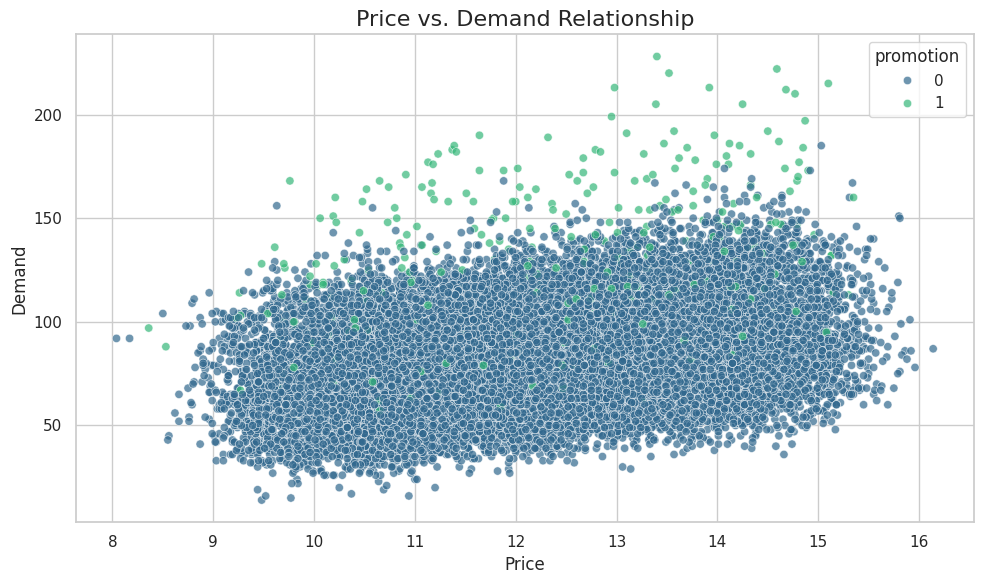

/tmp/ipython-input-1688758190.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='promotion', y='demand', data=df, palette='pastel')


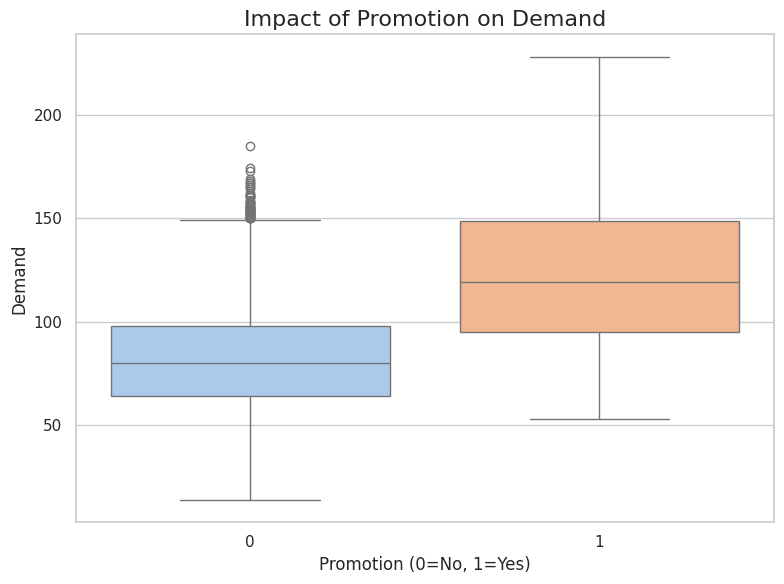

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
# Replace 'sample_product_demand.csv' with the actual path to your file
df = pd.read_csv('sample_product_demand.csv.gz')

# 2. Data Preprocessing
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Drop rows where 'demand' or 'promotion' might be missing to avoid errors
df = df.dropna(subset=['demand', 'promotion'])

# Ensure 'promotion' is treated as an integer (0 or 1)
df['promotion'] = df['promotion'].astype(int)

# Set a nice grid style for all plots
sns.set(style="whitegrid")

# -------------------------------------------------------
# Plot 1: Total Daily Demand Over Time (Line Chart)
# -------------------------------------------------------
plt.figure(figsize=(12, 6))
daily_demand = df.groupby('date')['demand'].sum()
plt.plot(daily_demand.index, daily_demand.values, linewidth=2, color='royalblue')
plt.title('Total Daily Demand Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Plot 2: Top 5 Products by Total Demand (Horizontal Bar Chart)
# -------------------------------------------------------
plt.figure(figsize=(10, 6))
# Sum demand by product, take top 5, and sort for plotting
top_products = df.groupby('product_name')['demand'].sum().nlargest(5).sort_values()
top_products.plot(kind='barh', color='teal')
plt.title('Top 5 Products by Total Demand', fontsize=16)
plt.xlabel('Total Demand', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Plot 3: Price vs. Demand Relationship (Scatter Plot)
# -------------------------------------------------------
plt.figure(figsize=(10, 6))
# 'hue' colors the points based on whether there was a promotion
sns.scatterplot(x='price', y='demand', hue='promotion', data=df, palette='viridis', alpha=0.7)
plt.title('Price vs. Demand Relationship', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Demand', fontsize=12)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Plot 4: Impact of Promotion on Demand (Box Plot)
# -------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='promotion', y='demand', data=df, palette='pastel')
plt.title('Impact of Promotion on Demand', fontsize=16)
plt.xlabel('Promotion (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Demand', fontsize=12)
plt.tight_layout()
plt.show()

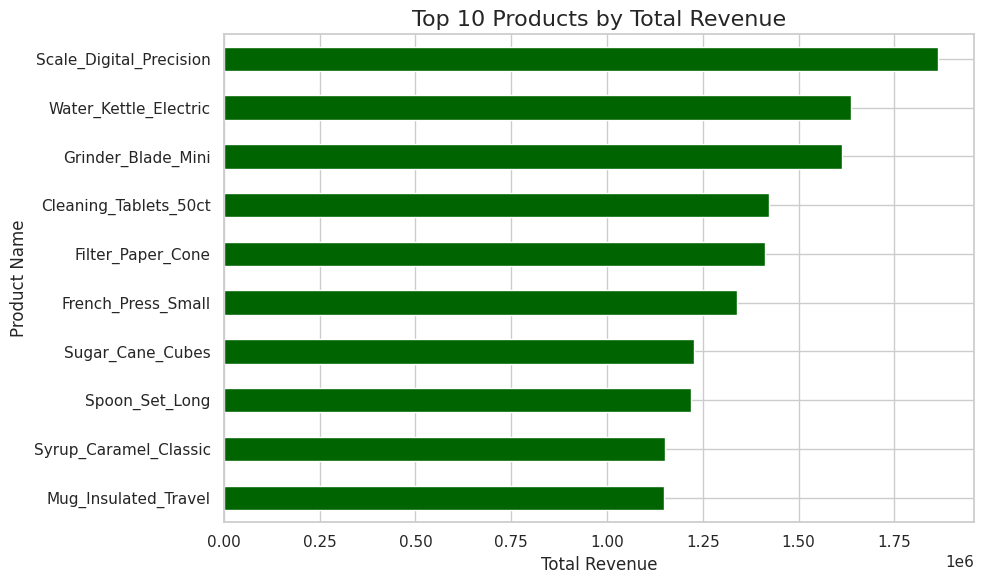

/tmp/ipython-input-143037979.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='demand', data=df, errorbar=None, palette='Blues_d')


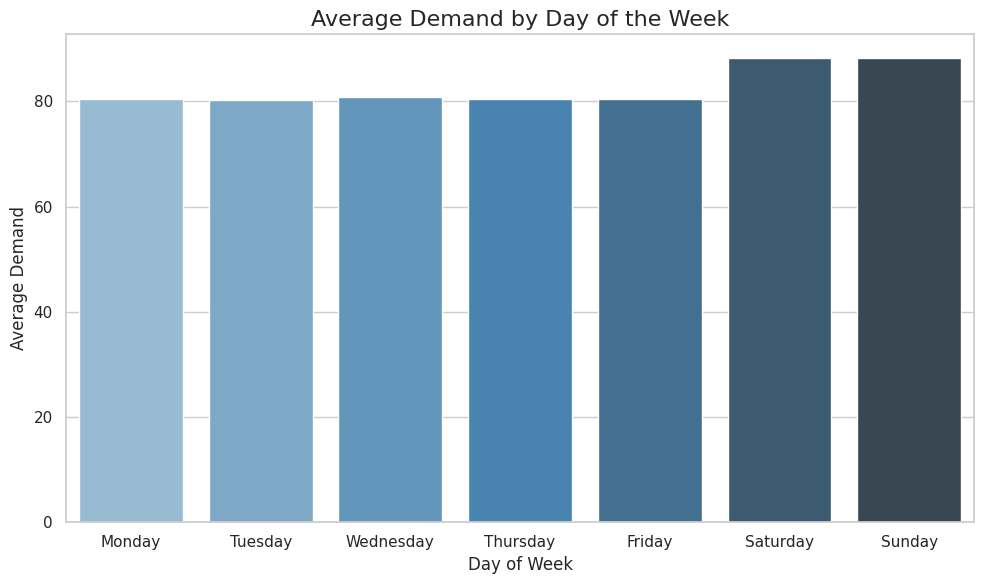

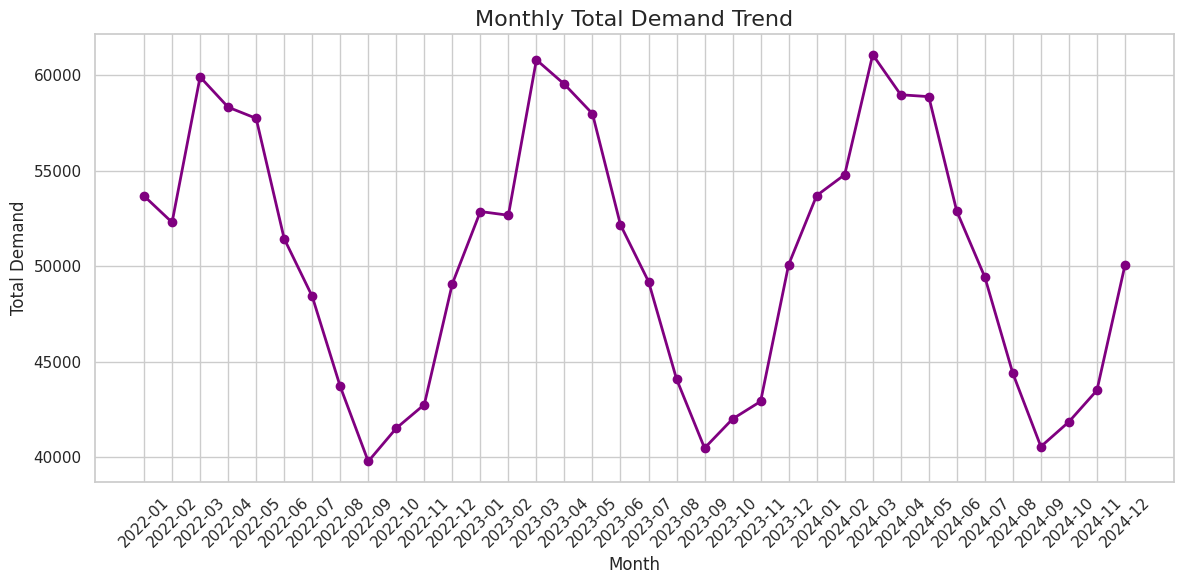

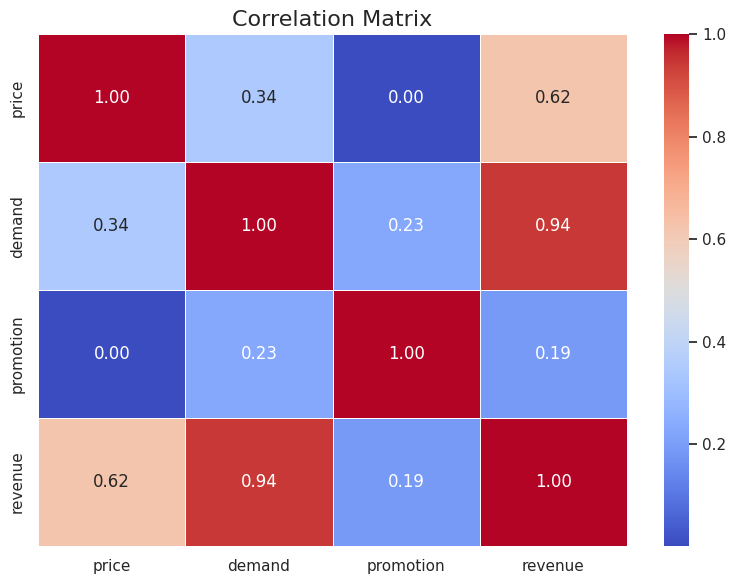

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv('sample_product_demand.csv.gz')

# 2. Data Cleaning & Feature Engineering
df['date'] = pd.to_datetime(df['date'])
df = df.dropna(subset=['demand', 'promotion'])
df['promotion'] = df['promotion'].astype(int)

# Calculate Revenue (Price * Demand)
df['revenue'] = df['price'] * df['demand']

# Extract Day of Week and Month
df['day_of_week'] = df['date'].dt.day_name()
# Set explicit order for days so they appear Mon-Sun on the chart
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# Extract Month (for aggregation)
df['month'] = df['date'].dt.to_period('M')

# Set plotting style
sns.set(style="whitegrid")

# -------------------------------------------------------
# Plot 1: Top 10 Products by Total Revenue
# -------------------------------------------------------
plt.figure(figsize=(10, 6))
# Calculate sum of revenue per product
top_revenue = df.groupby('product_name')['revenue'].sum().nlargest(10).sort_values()
top_revenue.plot(kind='barh', color='darkgreen')
plt.title('Top 10 Products by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Plot 2: Average Demand by Day of the Week
# -------------------------------------------------------
plt.figure(figsize=(10, 6))
# Barplot automatically calculates the mean (estimator='mean')
sns.barplot(x='day_of_week', y='demand', data=df, errorbar=None, palette='Blues_d')
plt.title('Average Demand by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Demand', fontsize=12)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Plot 3: Monthly Total Demand Trend
# -------------------------------------------------------
plt.figure(figsize=(12, 6))
monthly_demand = df.groupby('month')['demand'].sum()
# Convert period index to string for cleaner x-axis labels
monthly_demand.index = monthly_demand.index.astype(str)
plt.plot(monthly_demand.index, monthly_demand.values, marker='o', linewidth=2, color='purple')
plt.title('Monthly Total Demand Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Plot 4: Correlation Matrix Heatmap
# -------------------------------------------------------
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation
numerical_cols = ['price', 'demand', 'promotion', 'revenue']
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()